In [1]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import sys
sys.path.insert(0,'..')
from BMR.ml_models import *

plt.rcParams['figure.figsize'] = [8, 5.5]

# set seed
random.seed(1234)

# TODO: should we use StatsModels instead of sklearn?
#import statsmodels.api as sm

In [2]:
# fit linear model
def fit_lm(x, y, plot_x):
    reg = LinearRegression().fit(x, y)
    reg_pred = reg.predict(x)
    r2 = r2_score(y, reg_pred)
    mse = mean_squared_error(y, reg_pred)
    plot_y = reg.predict(plot_x)
    return r2, mse, plot_y

def fit_bmr(x, y, plot_x, epsilon):
    bmr = BMR(min_n_pts=10, M=25, substitution_policy='nearest', degree=1, epsilon=epsilon)
    bmr.fit(x, y)
    bmr_pred = bmr.predict(x)
    r2 = r2_score(y, bmr_pred)
    mse = mean_squared_error(y, bmr_pred)
    plot_y = bmr.predict(plot_x)
    return r2, mse, plot_y

def make_plot(x, y, true_model=None, main_title=''):
    plot_x = np.linspace(0, 1, 100).reshape(-1,1)
    colors = ['blue', 'green', 'orange', 'gray']
    epsilons = [0.05, 0.10, 0.2, 0.3]
    plt.plot(x, y, 'o', color='black')
    if true_model:
        plt.plot(true_model['x'], true_model['y'], '-', color='black', label='True model')
    out_lm  = fit_lm(x, y, plot_x)

    for epsilon, color in zip(epsilons, colors):
        out_bmr = fit_bmr(x, y, plot_x, epsilon=epsilon)
        plt.plot(plot_x, out_bmr[2], color=color, label=f'BMR eps={epsilon:.2f}, R2={out_bmr[0]:.4f}, MSE={out_bmr[1]:.4f}')
    
    plt.plot(plot_x, out_lm[2], color='tab:red', label=f'Linear Model, R2={out_lm[0]:.4f}, MSE={out_lm[1]:.4f}')
    plt.legend()
    plt.grid()
    plt.title(main_title)
    plt.show()

# Increasing noise in 1d

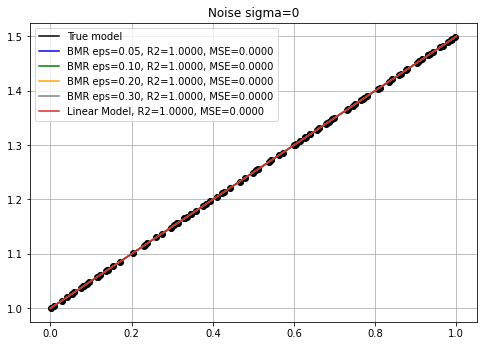

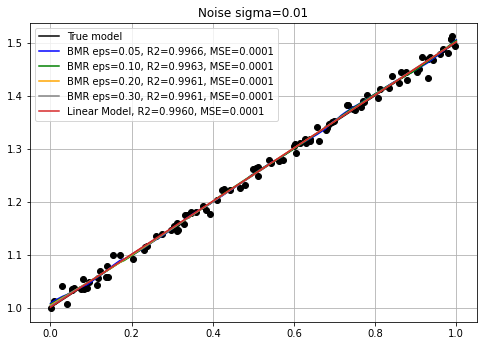

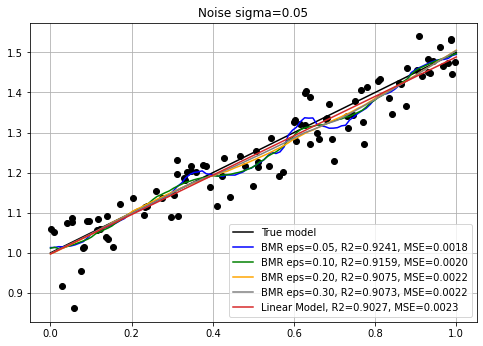

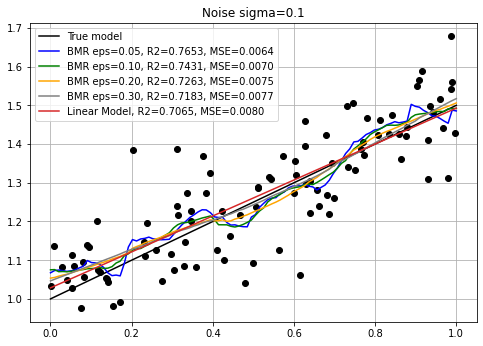

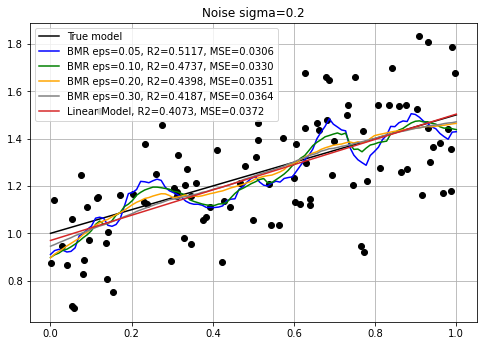

In [3]:
n_pts = 100
unif = ss.uniform()
x = unif.rvs(size=(n_pts, 1))

a = 0.5
b = 1

true_model = {}
true_model['x'] = np.linspace(0, 1, 25)
true_model['y'] = a*true_model['x'] + b

for sigma in [0, 0.01, 0.05, 0.1, 0.2]:
    norm = ss.norm(scale=sigma)
    y = a*x + b
    y += norm.rvs(size=(n_pts, 1))
    make_plot(x, y, main_title = f'Noise sigma={sigma}', true_model=true_model)

# Study outlieres
Take n=100 x-points. y is generated via a*x + b linear model with gaussian noise (sigma=0.05). 
Outlieres are generated by adding log-normally distributed bias to given % of points.true_model

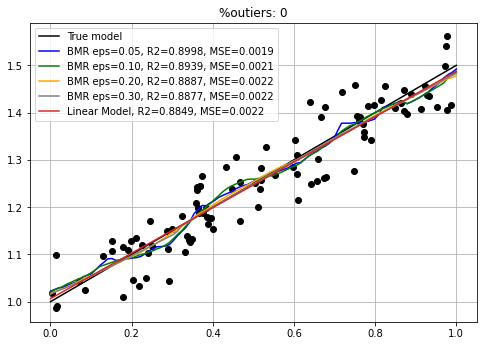

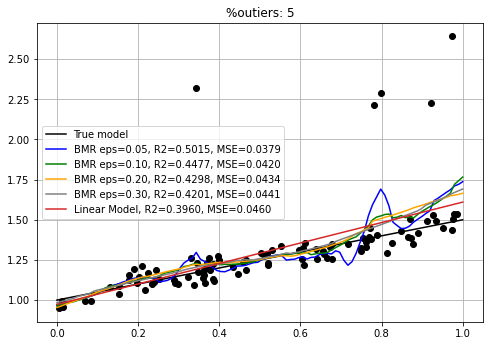

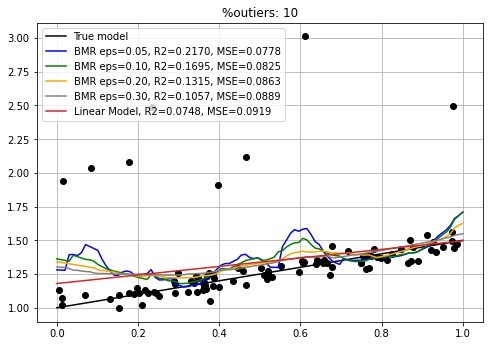

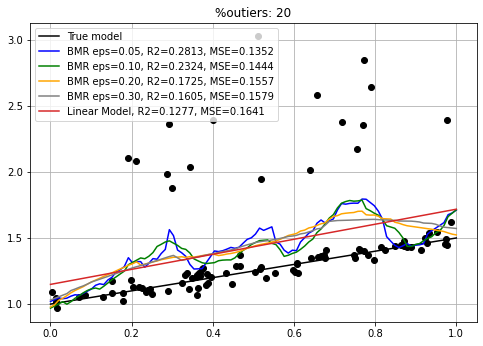

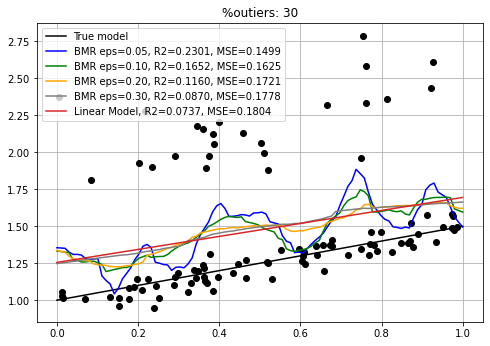

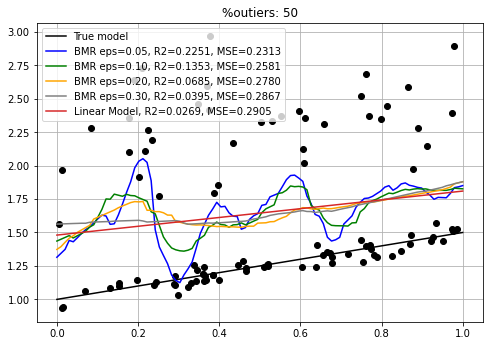

In [4]:
n_pts = 100
unif = ss.uniform()
x = unif.rvs(size=(n_pts, 1))

a = 0.5
b = 1

true_model = {}
true_model['x'] = np.linspace(0, 1, 25)
true_model['y'] = a*true_model['x'] + b

for outlier_prop in [0, 0.05, 0.1, 0.2, 0.3, 0.5]:
    norm = ss.norm(scale=0.05)
    y = a*x + b
    y += norm.rvs(size=(n_pts, 1))
    # outlier is generated by adding large positive bias
    if outlier_prop > 0:
        rnd_inds = random.choices(list(range(n_pts)), k=int(outlier_prop*n_pts))
        y[rnd_inds, :] += ss.lognorm(s=0.25).rvs(len(rnd_inds)).reshape(-1,1)
    
    make_plot(x, y, main_title = f'%outiers: {outlier_prop*100:.0f}', true_model=true_model) 

# Increasing non-linearity

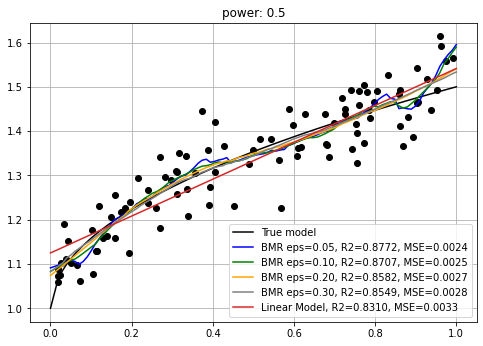

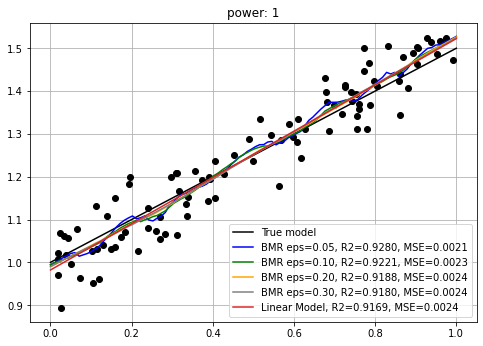

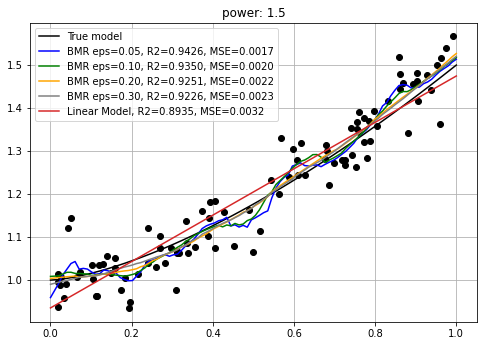

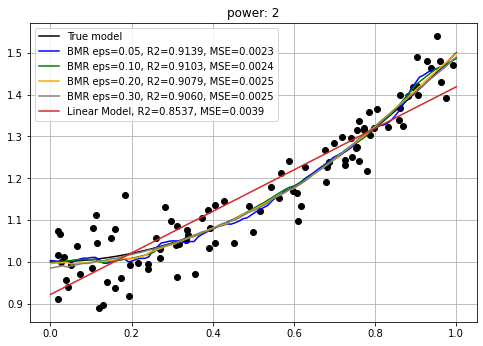

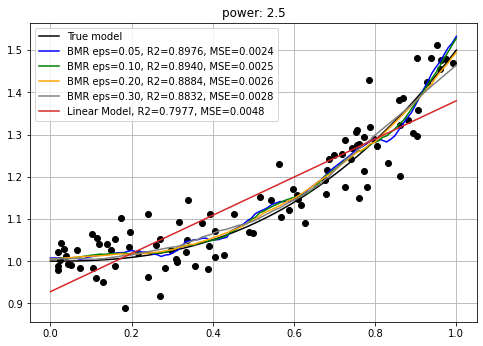

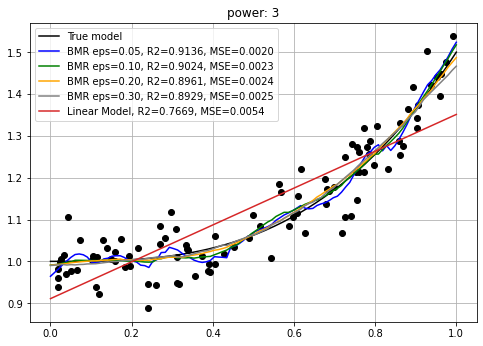

In [5]:
n_pts = 100
unif = ss.uniform()
x = unif.rvs(size=(n_pts, 1))

a = 0.5
b = 1

for power in [0.5, 1, 1.5, 2, 2.5, 3]:
    norm = ss.norm(scale=0.05)
    y = a*x**power + b
    true_model = {}
    true_model['x'] = np.linspace(0, 1, 50)
    true_model['y'] = a*true_model['x']**power + b
    y += norm.rvs(size=(n_pts, 1))
    make_plot(x, y, main_title = f'power: {power}', true_model=true_model) 